
# <span style="color:rgb(213,80,0)">Augmented Investment Funds data.</span>

This file creates Figure A.36\-A.43 and Table A.17

## Initial part

In [1]:
load InvFundsExt.mat
y=InvFundsExt{:,end};
X=InvFundsExt{:,[1 2]};

yXplot(y,X)

ans = 
  1x2 Line array:
    Line    Line


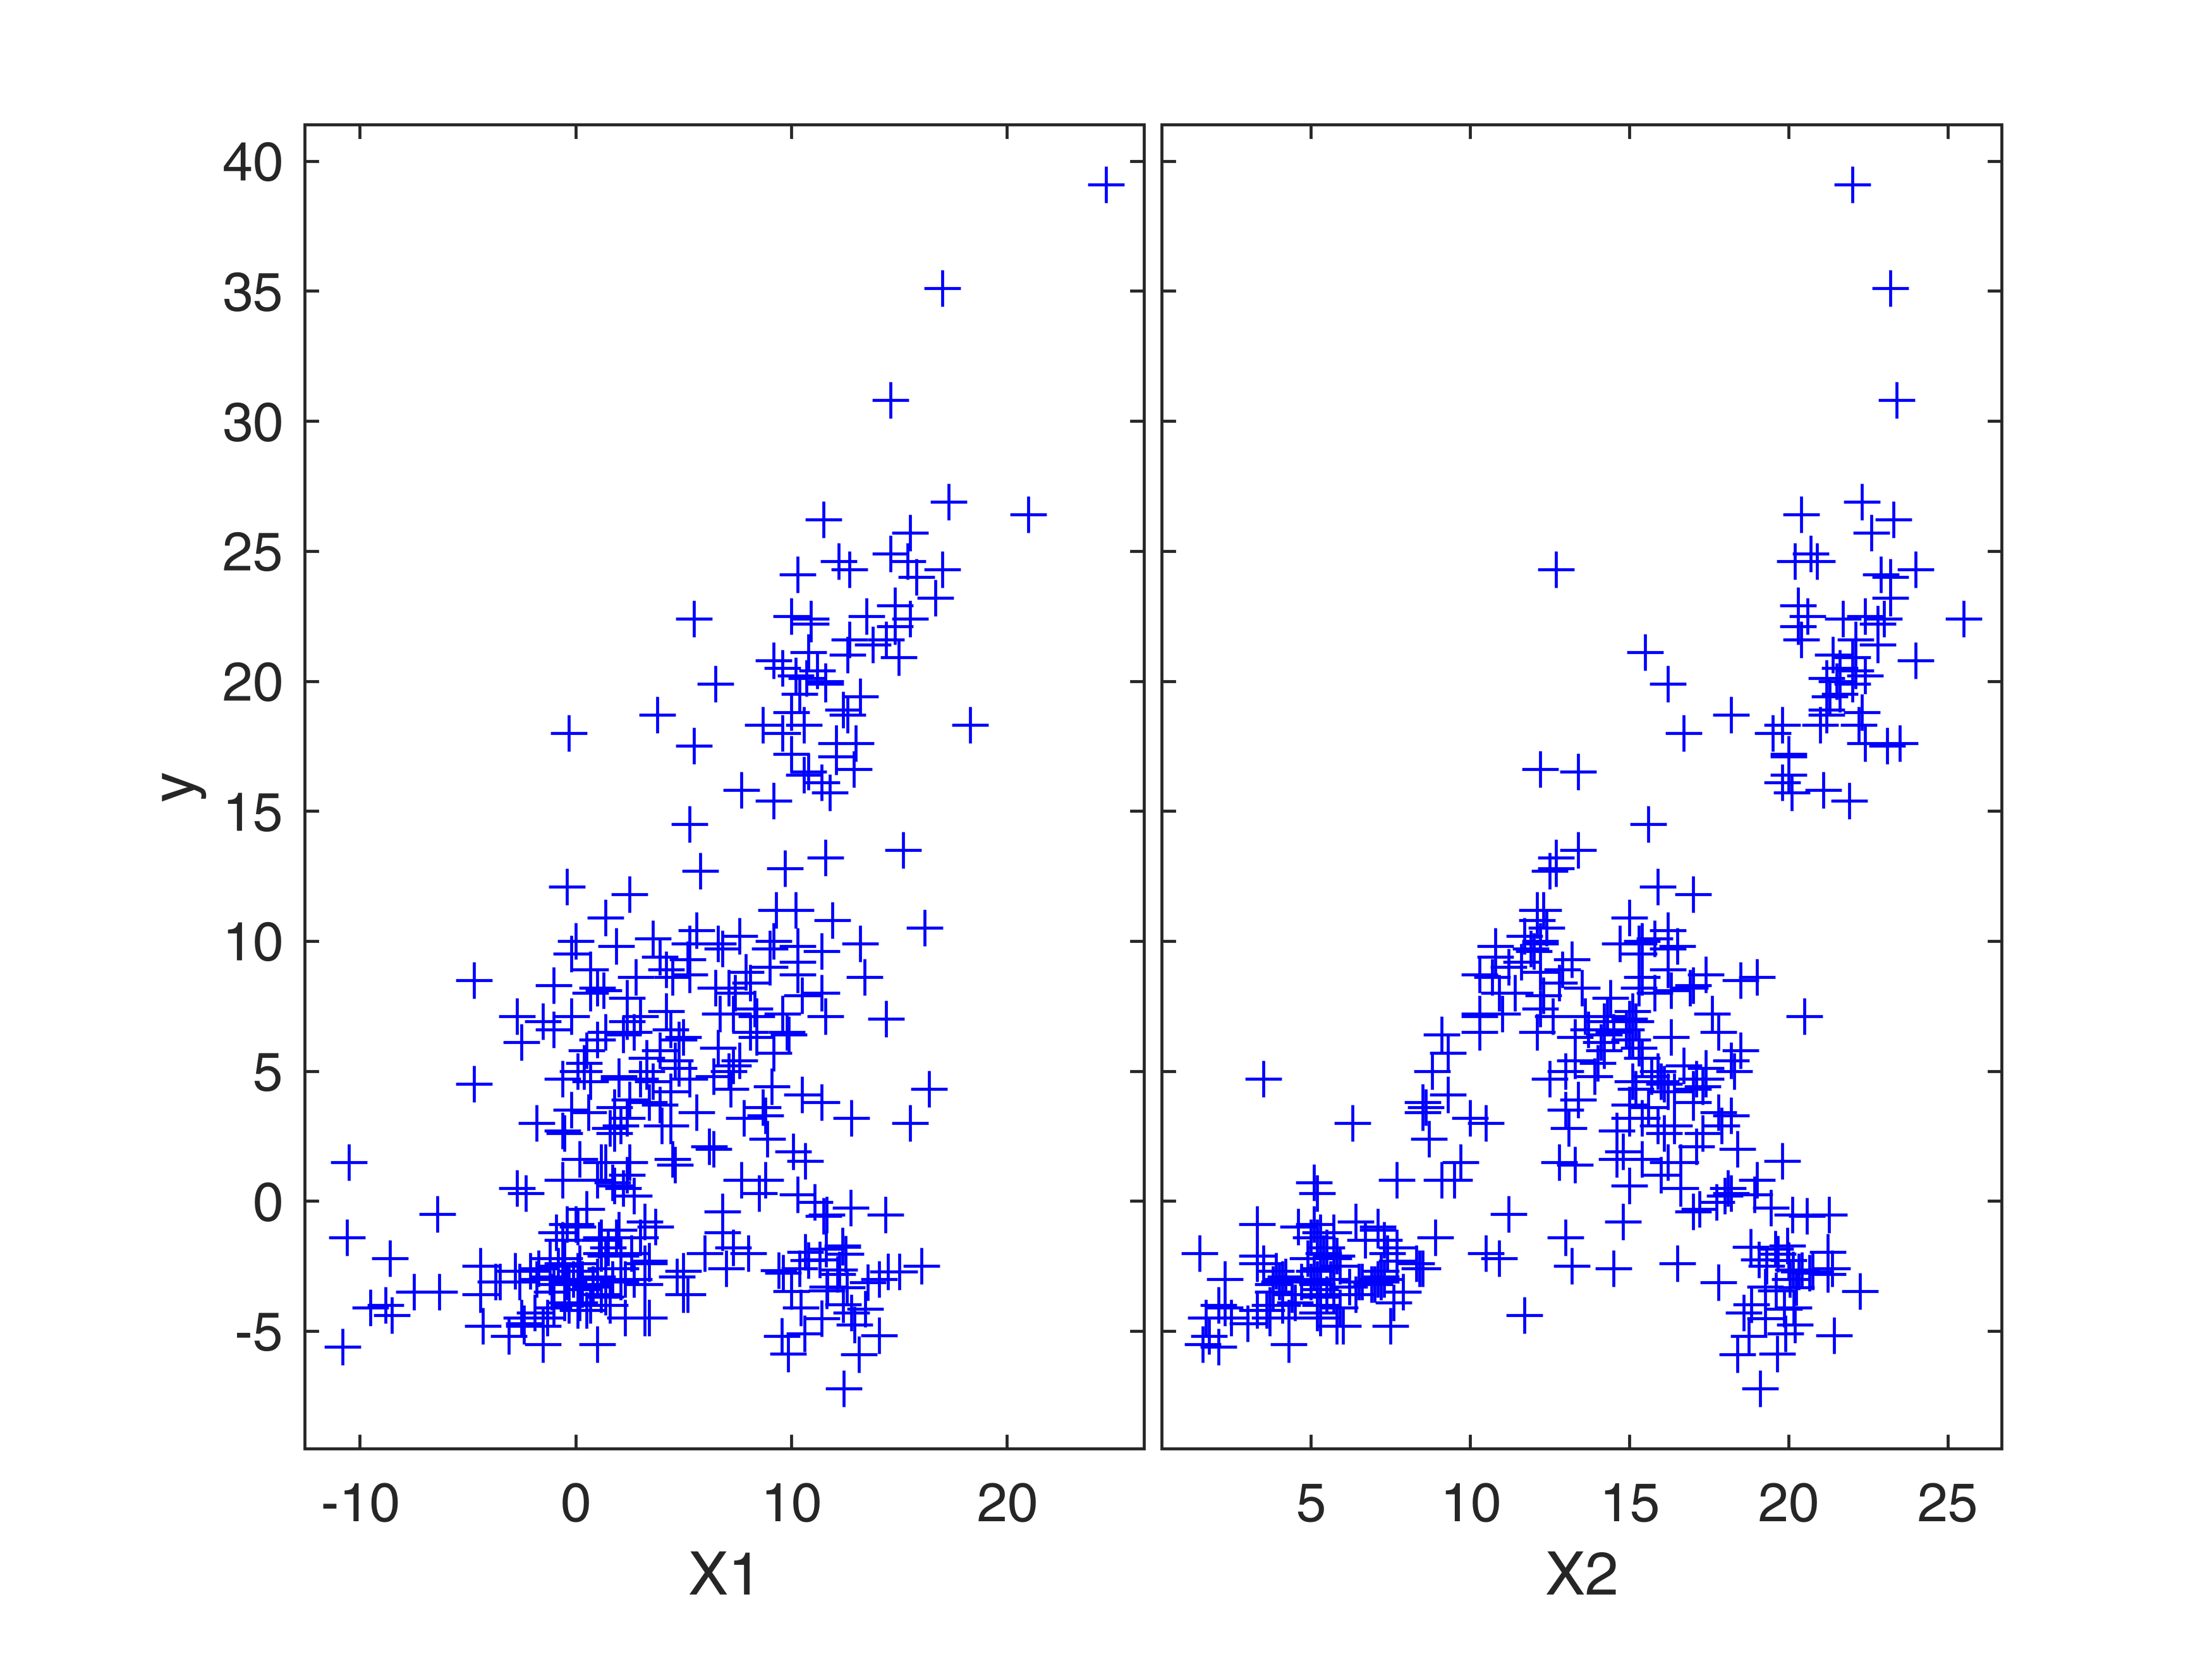

In [2]:
legend off

In [3]:

if prin==1
    print -depsc NPyXplot.eps
else
    title('Figure A.35')
    set(gcf,"Name",'Figure A.35')
end

Unrecognized function or variable 'prin'.

In [4]:

[n,p]=size(X);

prin=0;
nameXy=InvFundsExt.Properties.VariableNames;

## Create Figure A.36 (left panel)

fanplot just one lambda


In [5]:
la=[0.5 0.75 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJ','plots',1,'init',round(n/3),'ylimy',[-ylimy ylimy],'msg',0);
title('')

% fanplot(out)
if prin==1
    print -depsc figs\NPfan.eps
else
    title('Figure A.36 (left panel)')
    set(gcf,"Name",'Figure A.36 (left panel)')
end

## Create Figure A.36 (right panel)

fanplotpn (extended fanplot)


In [6]:
la=[0.5 0.75 1];
ylimy='';
out=FSRfan(y,X,'la',la,'family','YJpn','plots',1,'init',round(n/2), ...
    'ylimy',[-ylimy ylimy],'msg',0,'tag','plfanpn');
title('')

if prin==1
    print -depsc figs\NPfanpn.eps
else
    title('Figure A.36 (right panel)')
    set(gcf,"Name",'Figure A.36 (right panel)')
end

## Automatic procedure

In [7]:
[outFSRfan]=FSRfan(y,X,'plots',0,'init',round(n*0.3),'nsamp',10000,'la',[0 0.25 0.5 0.75 1 1.25],'msg',0,'family','YJ');
[outini]=fanBIC(outFSRfan,'plots',0);
if prin==1
    % print to postscript
    print -depsc figs\NPauto.eps;
end
% labest is the best value imposing the constraint that positive and
% negative observations must have the same tramsformation parameter.
labest=outini.labest;
disp('Best value of lambda (just using one lambda) from the automatic procedure')
disp(['lambda=' num2str(labest)])

## Create Figures A.37 and A.38

Automatic procedure


In [8]:
[outFSRfanpn]=FSRfan(y,X,'msg',0,'family','YJpn','la',labest,'plots',0);
out1=fanBICpn(outFSRfanpn);

fig=findobj(0,'tag','pl_BIC');
figure(fig(1))
if prin==1
    print -depsc figs\NPautopnBIC.eps;
else
    set(gcf,'Name', 'Figure A.37 (left panel)');
end

fig=findobj(0,'tag','pl_AGI');
figure(fig(1))
if prin==1
    print -depsc figs\NPautopnAGI.eps;
else
    set(gcf,'Name', 'Figure A.37 (right panel)');
end

fig=findobj(0,'tag','pl_nobs');
figure(fig(1))
if prin==1
    print -depsc figs\NPautopnh.eps;
else
    set(gcf,'Name', 'Figure A.38 (left panel)');
end

fig=findobj(0,'tag','pl_R2c');
figure(fig(1))
if prin==1
    print -depsc figs\NPautopnR2.eps;
else
    set(gcf,'Name', 'Figure A.38 (right panel)');
end

## Prepare the input for Figure A.39

Transformation


In [9]:
ytra=normYJpn(y, [], [1, 0], 'inverse',false, 'Jacobian', false);
out=FSR(ytra,X,'plots',0);
disp(['Number of outliers found in the transformed scale=' num2str(length(out.outliers))])

% Find the two groups (good units and outliers)
seq=1:n;
outliers=out.outliers;
sel=setdiff(seq,outliers);
ytrag=ytra(sel);
Xg=X(sel,:);

## Create Figure A.39

In [10]:
group=repelem("Good units",n,1);
group(outliers)="Outliers";
group=cellstr(group);
yXplot(ytra,X,group,'tag','pl_ytra');

if prin==1
    % print to postscript
    print -depsc figs\NPfsr.eps;
else
    sgtitle('Figure A.39 ')
    set(gcf,"Name",'Figure A.39')
end

## Create figure A.40

Comparison of normal QQ plots of residuals


In [11]:
nr=2;
nc=2;
figure
% residuals in the original scale
h1=subplot(nr,nc,1);
outLMy=fitlm(X,y);
restra=outLMy.Residuals{:,3};
qqplotFS(restra,'X',X,'plots',1,'h',h1);

% residual for the transformed EYJ scale (without the outliers)
h2=subplot(nr,nc,2);
outLMytrag=fitlm(Xg,ytrag);
restra=outLMytrag.Residuals{:,3};
qqplotFS(restra,'X',Xg,'plots',1,'h',h2);

if prin==1
    % print to postscript
    print -depsc figs\NP1.eps;
else
    sgtitle('Figure A.40 ')
    set(gcf,"Name",'Figure A.40')
end

## Create Figure A.41

In [12]:
figure
subplot(2,2,1)
plot(y,zscore(ytra),'o')
ylabel('YJ extended')
xlabel('y')

subplot(2,2,2)
l=4*ones(p,1);
outAVASy= avas(y,X,'l',l);
plot(y,outAVASy.ty,'o')
ylabel('AVAS')
xlabel('y')

subplot(2,2,3)
% ACE  (non monotonic)
l=[4*ones(p,1); 1];
outACE= ace(y,X,'l',l);
plot(y,outACE.ty,'o')
ylabel('ACE')
xlabel('y')

subplot(2,2,4)
% ACE  (monotonic)
l=[4*ones(p,1); 3];
outACEcy= ace(y,X,'l',l);
plot(y,outACEcy.ty,'o')
ylabel('ACE monotonic')
xlabel('y')

if prin==1
    % print to postscript
    print -depsc figs\NP2.eps;
else
    sgtitle('Figure A.41 ')
    set(gcf,"Name",'Figure A.41')
end

## Create Table A.18

In [13]:
A18=zeros(5,2);
% First row of Table A.18 OLS
R2y=outLMy.Rsquared.Ordinary;
A18(1,:)=[R2y NaN];

% Second row of Table A.18 (EYJ)
outLMytra=fitlm(X,ytra);
R2ytraEYJ=outLMytra.Rsquared.Ordinary;
R2ytragEYJ=outLMytrag.Rsquared.Ordinary;
A18(2,:)=[R2ytraEYJ R2ytragEYJ];

% Third row of Table A.18 (AVAS)
R2yAVAS=outAVASy.rsq;

l=4*ones(p,1);
outAVytrag= avas(ytrag,Xg,'l',l);
R2ytragAVAS=outAVytrag.rsq;
A18(3,:)=[R2yAVAS  R2ytragAVAS];

% Fourth row of Table A.18 (ACE)
R2yACE=outACE.rsq;
l=[4*ones(p,1); 1];
outACEytrag= ace(ytrag,Xg,'l',l);
R2ytragACE=outACEytrag.rsq;
A18(4,:)=[R2yACE R2ytragACE];

% Fifth row of Table A.18 (ACE monotonic)
R2yACEcy=outACEcy.rsq;

l=[4*ones(p,1); 3];
outACEcytrag= ace(ytrag,Xg,'l',l);
R2ytragACEc=outACEcytrag.rsq;
A18(5,:)=[R2yACEcy R2ytragACEc];

rownam=["Untransformed" "EYJ" "AVAS (no option)" "ACE" "ACE (monotonic)"];
colnam=["Contaminated" "Cleaned and transformed"];
A18t=array2table(A18,'RowNames',rownam,'VariableNames',colnam);
disp("Table A.18")
disp(A18t)

## Create Figure A.42

Create NP3 yres vs fitted original data


In [14]:
figure
subplot(2,2,1)
% l=[4*ones(p,1); 3];
% outACEc= ace(y,X,'l',l);
yhat=sum(outACEcy.tX,2);
res = outACEcy.ty - yhat;
plot(yhat,res,'o')
refline(0,0)
% title('Plot of residuals vs. fit')
ylabel('ACE residuals')
xlabel('Fitted values')

subplot(2,2,2)
% AVAS
yhat=sum(outAVASy.tX,2);

res = outAVASy.ty - yhat;
plot(yhat,res,'o')
refline(0,0)
% title('Plot of residuals vs. fit')
ylabel('AVAS residuals')
xlabel('Fitted values')

if prin==1
    % print to postscript
    print -depsc NP3.eps;
else
    sgtitle('Figure A.42 ')
    set(gcf,"Name",'Figure A.42')
end

## Create Figure A.43

Automatic selection of the options


In [15]:
outAVAS=avasms(y,X,'plots',0);
% Extract best solution
j=1;
outj=outAVAS{j,"Out"};
outrobAV=outj{:};

nameXy=replace(nameXy,"_", " ");
aceplot(outrobAV,'VarNames',nameXy,'notitle',true,'oneplot',true)

if prin==1
    % print to postscript
    print -depsc figs\NP4.eps;
else
    sgtitle('Figure A.43')
    set(gcf,"Name",'Figure A.43')
end

## Create Table A.19

In [16]:
disp('Table A.19: ANOVA in the transformed RAVAS scale')
outF=fitlm(outrobAV.tX,outrobAV.ty,'Exclude',outrobAV.outliers,'VarNames',nameXy);
disp(outF)

%InsideREADME